<h1 style="color:black;">HW06 </h1>

**BY WASIM RAJA MONDAL**

<h3 style="color:black;"> 1. Creating a folder on my computer</h3>

In [1]:
!pwd #created a folder

/Users/wasim/Desktop/HW06


In [2]:
!ls #created another folder data inside teh folder

HW06_MondalW.ipynb data


<h3 style="color:black;"> 2. From D2L, download Real Estate Data.csv and Create a Jupyter Notebook.</h3>

In [3]:
!pwd

/Users/wasim/Desktop/HW06


In [4]:
!ls data/

Real Estate Data - Week 6.csv


In [5]:
!ls

HW06_MondalW.ipynb data


<h3 style="color:black;"> 3. Import libraries (numpy, pandas, matplotlib, seaborn, statsmodels, style)</h3>

In [6]:
!pip install numpy #installing numpy
!pip install pandas #installing pandas
!pip install matplotlib #installing matplotlib
!pip install seaborn #installing seaborn
!pip install statsmodels #installing statmodel
!pip install scikit-learn #installing scikit learn
import numpy as np  #importing numpy
import pandas as pd #importing pandas
import seaborn as sns #importing seaborn
import pandas as pd #importing pandas
import statsmodels  #importing statmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use("seaborn-v0_8-whitegrid") ##a style that can be used for plots


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


<h3 style="color:black;"> 4. Import Data</h3>

In [7]:
#importing a csv file Real Estate Data - Week 6.csv from the directory named as data with index_col=none and header=0
#index_col=none suggests no column should be used as index. Pandas will autometically generate a numeric index (0,1,2,..) 
#header=0 means the first row (row 0) of the csv file contains the column names

In [8]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 6.csv', index_col = None, header=0)

In [9]:
df_realestate.info() #executing the view of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1387 non-null   int64  
 1   Dwelling Type                  1387 non-null   object 
 2   Lot Frontage                   1387 non-null   float64
 3   Lot Area                       1387 non-null   int64  
 4   Land Contour                   1387 non-null   object 
 5   Neighborhood                   1387 non-null   object 
 6   Location Condition             1387 non-null   object 
 7   Overall Quality                1387 non-null   int64  
 8   Overall Cond                   1387 non-null   int64  
 9   Year Built                     1387 non-null   int64  
 10  Masonry/Veneer Area            1387 non-null   float64
 11  Basement Finished Area         1387 non-null   int64  
 12  Basement Unfinished Area       1387 non-null   i

<h3 style="color:black;"> 5. Create the Dataset for Regression</h3>

<h4 style="color:black;"> 5a: Encode Kitchen Qual</h4>

In [10]:
#Create a code block to import Label Encoder from sklearn.
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [11]:
#code block and to show value_count for Kitchen Qual.
df_realestate['Kitchen Qual'].value_counts(dropna=False)

Kitchen Qual
Average      691
Good         575
Excellent     88
Fair          33
Name: count, dtype: int64

In [12]:
#A defined function to encode the values for Kitchen Qual
def incomever(v):
    if v['Kitchen Qual'] == 'Excellent':
        return 4
    elif v['Kitchen Qual'] == 'Good':
        return 3
    elif v['Kitchen Qual'] == 'Average':
        return 2
    elif v['Kitchen Qual'] == 'Fair':
        return 1    
    else:
        return 0
df_realestate['Kitchen Qual'] = df_realestate.apply(incomever, axis = 1)

In [13]:
#checking the correctness of encoding Kitchen Qual
df_realestate['Kitchen Qual'].value_counts(dropna=False)

Kitchen Qual
2    691
3    575
4     88
1     33
Name: count, dtype: int64

<h4 style="color:black;"> 5b: Create X and y</h4>

In [14]:
#creating a dataframe for regerssion model by copying from original dataset
df_reg = df_realestate.copy()

In [15]:
df_reg.columns

Index(['Id', 'Dwelling Type', 'Lot Frontage', 'Lot Area', 'Land Contour',
       'Neighborhood', 'Location Condition', 'Overall Quality', 'Overall Cond',
       'Year Built', 'Masonry/Veneer Area', 'Basement Finished Area',
       'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
       'Bedrooms Above Grade', 'Kitchen Qual', 'Total Rooms Above Grade',
       'Fireplaces', 'Garage Finish', 'Garage Cars', 'Sale Condition',
       'Sale Price', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Pool',
       'Extra Kitchens', 'Baths per Bedroom', 'dt_1-1/2 STORY ALL AGES',
       'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD', 'dt_2 FAMILY CONVERSION',
       'dt_2-1/2 STORY ALL AGES', 'dt_2-STORY 1945 & OLDER',
       'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD', 'dt_DUPLEX',
       'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked',
       'lc_Depression', 'lc_Hillside', 'nh_Bloomington Heights', 'nh_Bluestem',
       'nh_Briardale', 'nh_Brookside', 'nh_Clear Creek', 'n

In [16]:
X=df_reg[['Id', 'Dwelling Type', 'Lot Frontage', 'Lot Area', 'Land Contour','Neighborhood', 'Location Condition', 'Overall Quality', 'Overall Cond','Year Built', 'Masonry/Veneer Area', 'Basement Finished Area',
       'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
       'Bedrooms Above Grade', 'Kitchen Qual', 'Total Rooms Above Grade',
       'Fireplaces', 'Garage Finish', 'Garage Cars', 'Sale Condition',
       'Sale Price', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Pool',
       'Extra Kitchens', 'Baths per Bedroom', 'dt_1-1/2 STORY ALL AGES',
       'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD', 'dt_2 FAMILY CONVERSION',
       'dt_2-1/2 STORY ALL AGES', 'dt_2-STORY 1945 & OLDER',
       'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD', 'dt_DUPLEX',
       'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked',
       'lc_Depression', 'lc_Hillside', 'nh_Bloomington Heights', 'nh_Bluestem',
       'nh_Briardale', 'nh_Brookside', 'nh_Clear Creek', 'nh_College Creek',
       'nh_Crawford', 'nh_Edwards', 'nh_Gilbert', 'nh_Iowa DOT and Rail Road',
       'nh_Meadow Village', 'nh_Mitchell', 'nh_Northpark Villa',
       'nh_Northridge', 'nh_Northridge Heights', 'nh_Northwest Ames',
       'nh_Old Town', 'nh_Sawyer', 'nh_Sawyer West', 'nh_Somerset',
       'nh_South & West of Iowa State', 'nh_Stone Brook', 'nh_Timberland',
       'nh_Veenker', 'locc_Adjacent Arterial St', 'locc_Adjacent Feeder St',
       'locc_Adjacent Pos Feature', 'locc_Adjacent Railroad',
       'locc_Near Pos Feature', 'locc_Near Railroad', 'sc_Abnormal Sale',
       'sc_Allocation', 'sc_Home not complete', 'sc_Sale within Family',
       'gf_Finished', 'gf_Rough Finished', 'gf_Unfinished']]

In [17]:
#displaying data information in X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1387 non-null   int64  
 1   Dwelling Type                  1387 non-null   object 
 2   Lot Frontage                   1387 non-null   float64
 3   Lot Area                       1387 non-null   int64  
 4   Land Contour                   1387 non-null   object 
 5   Neighborhood                   1387 non-null   object 
 6   Location Condition             1387 non-null   object 
 7   Overall Quality                1387 non-null   int64  
 8   Overall Cond                   1387 non-null   int64  
 9   Year Built                     1387 non-null   int64  
 10  Masonry/Veneer Area            1387 non-null   float64
 11  Basement Finished Area         1387 non-null   int64  
 12  Basement Unfinished Area       1387 non-null   i

In [18]:
#removing all the featyres that has object datatype
X=X.drop(['Dwelling Type', 'Land Contour', 'Neighborhood', 'Location Condition', 'Garage Finish', 'Sale Condition'], axis=1)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1387 non-null   int64  
 1   Lot Frontage                   1387 non-null   float64
 2   Lot Area                       1387 non-null   int64  
 3   Overall Quality                1387 non-null   int64  
 4   Overall Cond                   1387 non-null   int64  
 5   Year Built                     1387 non-null   int64  
 6   Masonry/Veneer Area            1387 non-null   float64
 7   Basement Finished Area         1387 non-null   int64  
 8   Basement Unfinished Area       1387 non-null   int64  
 9   1st Floor Area                 1387 non-null   int64  
 10  2nd Floor Area                 1387 non-null   int64  
 11  Bedrooms Above Grade           1387 non-null   int64  
 12  Kitchen Qual                   1387 non-null   i

In [20]:
#We can see from above there above, there is no feature in X that has object data type

In [21]:
#next we remove target variable Sale Price from X

In [22]:
X=X.drop('Sale Price', axis=1)

In [23]:
y = df_reg['Sale Price']

<h3 style="color:black;"> 6. Create an Initial Multiple Regression Model</h3>

<h4 style="color:black;"> 6a: Create Initial Multiple Regression Model</h4>

In [24]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

pred = reg.predict(X)
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:41:44   Log-Likelihood:                -15771.
No. Observations:                1387   AIC:                         3.169e+04
Df Residuals:                    1313   BIC:                         3.208e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -7.342e+05   1.22e+05     -6.020      0.000   -9.73e+05   -4.95e+05
Id                               -0.5736      1.412     -0.406      0.685      -3.344       2.196
Lot Frontage                     15.9953     19.386      0.825      0.409     -22.035      54.026
Lot Area                          0.4953      0.073      6.815      0.000       0.353       0.638
Overall Quality                1.053e+04    863.328     12.196      0.000    8835.632    1.22e+04
Overall Cond                   5107.2161    650.770      7.848      0.000    3830.554    6383.878
Year Built                      348.5315     62.245      5.599      0.000     226.420     470.643
Masonry/Veneer Area              13.9779      4.196      3.332      0.001       5.747      22.209
Basement Finished Area           25.9996      2.681      9.697      0.000      20.740      31.260
Basement Unfinished Area          7.2700      2.529      2.874      0.004       2.308      12.232
1st Floor Area                   60.8625      3.794     16.042      0.000      53.419      68.305
2nd Floor Area                   53.5580      4.171     12.841      0.000      45.376      61.740
Bedrooms Above Grade          -6208.4343   1500.733     -4.137      0.000   -9152.530   -3264.338
Kitchen Qual                   7814.4087   1382.556      5.652      0.000    5102.149    1.05e+04
Total Rooms Above Grade        1135.6876    842.909      1.347      0.178    -517.907    2789.282
Fireplaces                     1967.4852   1182.420      1.664      0.096    -352.153    4287.124
Garage Cars                    8704.1972   1448.059      6.011      0.000    5863.435    1.15e+04
Porch Area                       23.3637      4.360      5.359      0.000      14.811      31.917
Full Bathrooms                 2850.7105   1821.586      1.565      0.118    -722.827    6424.248
Half Bathrooms                 1726.5244   1514.200      1.140      0.254   -1243.991    4697.040
Pool                           1.177e+04   1.02e+04      1.152      0.250   -8283.892    3.18e+04
Extra Kitchens                -1.786e+04   5064.862     -3.526      0.000   -2.78e+04   -7923.498
Baths per Bedroom              -172.2450   3592.153     -0.048      0.962   -7219.231    6874.741
dt_1-1/2 STORY ALL AGES       -4654.5591   3623.068     -1.285      0.199   -1.18e+04    2453.076
dt_1-STORY 1945 & OLDER        -410.0434   4040.319     -0.101      0.919   -8336.229    7516.142
dt_1-STORY PUD                -2.341e+04   3581.662     -6.535      0.000   -3.04e+04   -1.64e+04
dt_2 FAMILY CONVERSION        -5476.5749   5889.155     -0.930      0.353    -1.7e+04    6076.607
dt_2-1/2 STORY ALL AGES       -8368.2251   7577.839     -1.104      0.270   -2.32e+04    6497.770
dt_2-STORY 1945 & OLDER       -5008.7958   51

<h4 style="color:black;"> 6b: Analyze the Initial Multiple Regression Results</h4>

<h4 style="color:black;"> Visualize the Residual Plots</h4>

Text(70.20833333333333, 0.5, 'Residual')

<Figure size 2000x800 with 0 Axes>

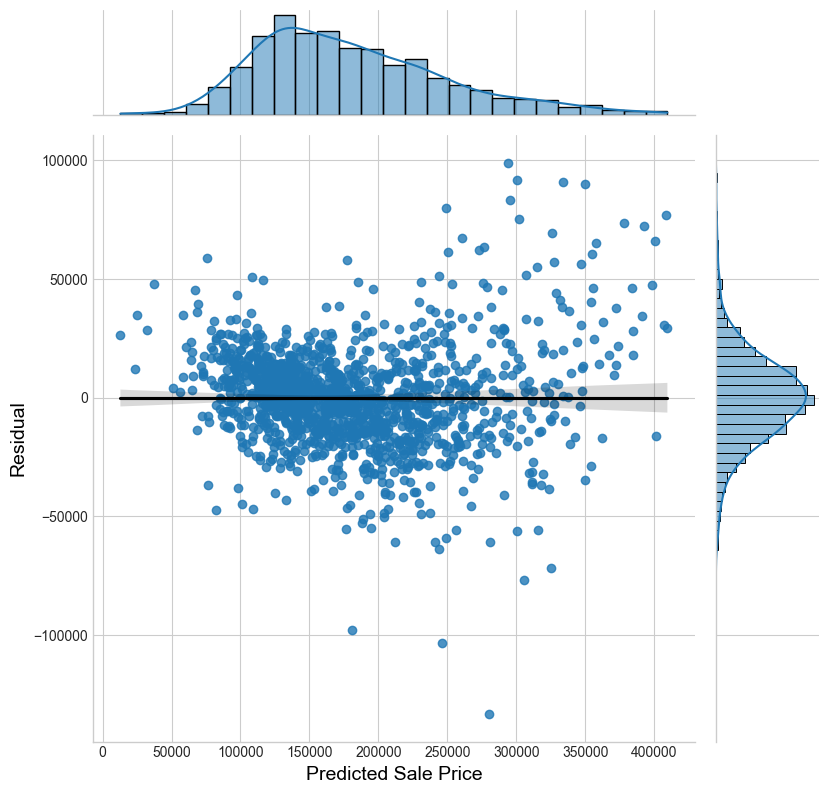

In [25]:
x=pred
y=resid
plt.figure(figsize=(20,8))
sns.jointplot(x=x, y=y, kind = "reg", data = df_realestate, ratio=5, height = 8,
              line_kws={'color': 'black'})
plt.xlabel('Predicted Sale Price', color = 'black', fontsize='14',loc='center')
plt.ylabel('Residual', color = 'black', fontsize='14',loc='center')

<h4 style="color:black;"> Create a Correlation Matrix</h4>

In [26]:
# Dropping the ‘Const' column from the X
X= X.drop(["const"], axis = 1)

In [27]:
corrMatrix=X.corr()
df_corrMatrix=pd.DataFrame(corrMatrix)
df_corrMatrix

,Id,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Kitchen Qual,Total Rooms Above Grade,Fireplaces,Garage Cars,Porch Area,Full Bathrooms,Half Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished
Id,1.000000,-0.029638,-0.044714,-0.026044,0.028158,-0.026197,-0.063687,-0.025705,0.001349,0.000389,-0.001543,0.033011,0.014325,0.025866,-0.023635,0.006086,-0.031009,-0.005258,-0.017044,0.038420,0.005658,-0.008074,0.025498,0.004833,0.006349,-0.030573,-0.033656,0.016232,-0.032240,0.008577,0.024989,0.028440,0.025889,0.023828,-0.019923,0.018888,0.011841,0.004451,-0.002560,0.003187,-0.049815,-0.001926,0.035643,0.021273,0.011660,-0.037966,0.008362,0.008701,0.010030,0.028025,-0.069728,0.052202,-0.019929,-0.007507,-0.029347,0.016222,0.041008,-0.017807,0.014339,-0.023406,-0.009504,0.026333,-0.010157,0.016091,0.004355,-0.034229,-0.007550,-0.003413,-0.026689,0.005379,-0.006292,0.012181,-0.000465
Lot Frontage,-0.029638,1.000000,0.066948,0.139714,-0.047409,0.021453,0.068354,-0.000469,0.149397,0.187143,0.007172,0.130475,0.105157,0.183705,0.005826,0.156036,0.017302,0.068567,-0.047530,0.042572,0.036336,-0.067688,-0.005255,-0.017841,-0.169867,0.018106,0.044041,0.016942,0.046856,-0.212311,0.048754,-0.026362,-0.033133,0.016925,-0.073791,0.083951,-0.061193,-0.037429,-0.114143,-0.028842,-0.071763,0.027601,0.001499,0.025699,-0.057575,0.000335,-0.076424,-0.031207,-0.076962,0.060276,0.156013,-0.051304,0.021027,-0.064412,0.018953,0.008575,-0.012412,-0.034995,0.034702,-0.051280,0.062076,0.025771,0.050886,-0.011321,-0.081303,0.001677,-0.004469,-0.014972,0.166247,0.030157,0.040480,0.063409,-0.090919
Lot Area,-0.044714,0.066948,1.000000,0.065029,0.000716,-0.005572,0.051788,0.159935,-0.009324,0.251585,0.013684,0.105437,0.034720,0.148136,0.249338,0.127428,0.149893,0.182208,0.009198,0.035640,-0.012915,0.046258,0.002846,-0.052736,-0.132769,0.077034,0.004964,-0.006383,0.051291,-0.170927,-0.009045,-0.014165,0.009080,0.008477,0.365442,0.079225,-0.079447,-0.033888,-0.094423,-0.057458,0.293223,-0.030200,0.026362,-0.022409,0.022245,-0.036486,-0.065861,0.015108,-0.058702,0.049729,0.006651,0.032122,-0.063575,-0.000503,-0.011373,-0.068340,-0.032750,-0.029493,0.227331,0.046152,-0.011412,-0.005847,0.047035,0.031052,0.008458,-0.014275,-0.029849,0.012811,0.000583,-0.010674,0.075894,0.017024,-0.059019
Overall Quality,-0.026044,0.139714,0.065029,1.000000,-0.120603,0.594036,0.382993,0.189307,0.302580,0.439118,0.260637,0.066511,0.665918,0.389607,0.370073,0.606283,0.274596,0.484446,0.208815,0.021632,-0.178664,0.333275,-0.171829,-0.256611,0.181518,-0.117875,0.023374,-0.007809,0.337349,0.003897,-0.145273,-0.060496,-0.021128,-0.108020,-0.048957,0.104071,0.088073,-0.003380,-0.034848,-0.142576,-0.028138,0.135651,0.026175,-0.220865,0.080478,-0.170961,-0.090406,-0.070657,-0.007188,0.206315,0.372243,0.036972,-0.161842,-0.193808,0.032584,0.234174,-0.069674,0.187168,0.138036,0.040664,-0.084328,-0.137440,0.028816,-0.004689,0.032666,0.012953,-0.103849,-0.056568,0.310989,-0.028844,0.381246,0.222348

<h4 style="color:black;"> Create the Variance Inflation Factor (VIF)</h4>

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
#Creating the Variance Inflation Factor (VIF) for the new model
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,Features
5,172.0,Year Built
13,95.2,Total Rooms Above Grade
3,83.7,Overall Quality
9,62.4,1st Floor Area
11,60.1,Bedrooms Above Grade
...,...,...
31,1.1,dt_SPLIT FOYER
64,1.1,locc_Near Pos Feature
62,1.1,locc_Adjacent Pos Feature
65,1.1,locc_Near Railroad


<h4 style="color:black;"> Explanation of the results</h4>

**Report the results of the model**

R-squared value is found to be 0.913 which is good. In ideal case, it should be close to 1. Hence, current model is significant. 

AIC stands for Akaike Information Criterion and BIC stands for Bayesian Information Criterion. They are used in evaluating the model by balancing the goodness-of-fit the data. The lower the AIC and BIC, the better the model. We can see, the AIC and BIC of the current model is high. Below, its value is printed out. These values would give more insight when it is compared with other models. But, the current value indicates that model is complex. Datafit is also not ldeal.   

In [30]:
round(3.169e+04)

31690

In [31]:
round(3.208e+04)

32080

The F statistics and Prob F statistics are used to evaluate model's performance. F statistics measure how much the variability in the data is explained by the model complared to how much is not explained. A larger F statistics indicates a stronger relationship between the independent and dependent variables. We can see F statics value found to be large which suggests that the model is statistically significant and the independent variable are suitable for variation of the target variable. The Prob F-Statics or P-value indicates the probbaility of observing F-statiscs if the null hypothesis or no relationship were true. We can also see p values are most of the features are small which indicates all these features are contributing to the model. However, there are features for example, Baths per bedroom has high p values. So, these features which have high p -values are not significantly contributing to the model. There are 34 features which has p value higher-than 0.1.
However, from the VIF factor analysis, we find features like Year Built, Total Rooms Above Grade and so on have high VIF factor. These features with high VIF introduce collinearity in the model.    

<h3 style="color:black;"> 7. Re-Run the Multiple Regression Model to eliminate Non-Significant Features</h3>

In [32]:
X = X.drop(['Id','Lot Frontage','Full Bathrooms','Half Bathrooms', 'Pool', 'Baths per Bedroom', 'dt_1-1/2 STORY ALL AGES','dt_2 FAMILY CONVERSION','dt_2-1/2 STORY ALL AGES', 'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked', 'lc_Depression','nh_Bloomington Heights','nh_Bluestem', 'nh_Clear Creek', 'nh_College Creek', 'nh_Edwards', 'nh_Gilbert', 'nh_Iowa DOT and Rail Road'], axis=1)

In [33]:
X=X.drop(['nh_Meadow Village', 'nh_Mitchell', 'nh_Old Town', 'nh_Sawyer', 'nh_Sawyer West', 'nh_South & West of Iowa State', 'nh_Timberland', 'locc_Near Pos Feature'], axis=1)

In [34]:
X=X.drop(['locc_Near Railroad', 'sc_Allocation' ], axis=1)

In [35]:
y=df_reg['Sale Price']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot Area                   1387 non-null   int64  
 1   Overall Quality            1387 non-null   int64  
 2   Overall Cond               1387 non-null   int64  
 3   Year Built                 1387 non-null   int64  
 4   Masonry/Veneer Area        1387 non-null   float64
 5   Basement Finished Area     1387 non-null   int64  
 6   Basement Unfinished Area   1387 non-null   int64  
 7   1st Floor Area             1387 non-null   int64  
 8   2nd Floor Area             1387 non-null   int64  
 9   Bedrooms Above Grade       1387 non-null   int64  
 10  Kitchen Qual               1387 non-null   int64  
 11  Total Rooms Above Grade    1387 non-null   int64  
 12  Fireplaces                 1387 non-null   int64  
 13  Garage Cars                1387 non-null   int64

<h4 style="color:black;"> 7a: Re-run a Multiple Regression model (Model 2) after removing the features with a p-value above 0.100</h4>

In [37]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

pred = reg.predict(X)
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     345.5
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:12   Log-Likelihood:                -15785.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1346   BIC:                         3.187e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -8.24e+05   7.26e+04    -11.350      0.000   -9.66e+05   -6.82e+05
Lot Area                      0.5245      0.064      8.241      0.000       0.400       0.649
Overall Quality            1.044e+04    816.538     12.780      0.000    8833.294     1.2e+04
Overall Cond               5016.1101    632.038      7.936      0.000    3776.223    6255.997
Year Built                  393.5570     36.834     10.685      0.000     321.298     465.816
Masonry/Veneer Area          13.5234      4.034      3.352      0.001       5.610      21.437
Basement Finished Area       27.8419      2.483     11.212      0.000      22.970      32.713
Basement Unfinished Area      6.9055      2.377      2.905      0.004       2.242      11.569
1st Floor Area               63.1271      3.513     17.970      0.000      56.236      70.018
2nd Floor Area               51.4763      2.914     17.663      0.000      45.759      57.193
Bedrooms Above Grade      -5544.3169   1144.882     -4.843      0.000   -7790.265   -3298.369
Kitchen Qual               8401.9043   1330.688      6.314      0.000    5791.456     1.1e+04
Total Rooms Above Grade    1150.2298    820.499      1.402      0.161    -459.367    2759.826
Fireplaces                 1968.0997   1130.180      1.741      0.082    -249.006    4185.205
Garage Cars                8571.1051   1396.898      6.136      0.000    5830.771    1.13e+04
Porch Area                   25.3093      4.188      6.043      0.000      17.094      33.525
Extra Kitchens            -2.232e+04   3195.346     -6.986      0.000   -2.86e+04   -1.61e+04
dt_1-STORY 1945 & OLDER    1249.8403   3232.282      0.387      0.699   -5091.017    7590.698
dt_1-STORY PUD            -2.164e+04   2885.690     -7.500      0.000   -2.73e+04    -1.6e+04
dt_2-STORY PUD            -3.104e+04   3796.232     -8.176      0.000   -3.85e+04   -2.36e+04
lc_Hillside                1.201e+04   3365.106      3.568      0.000    5405.281    1.86e+04
nh_Briardale                1.09e+04   6625.905      1.644      0.100   -2102.444    2.39e+04
nh_Brookside               1.138e+04   3371.721      3.376      0.001    4767.746     1.8e+04
nh_Crawford                2.274e+04   3485.100      6.524      0.000    1.59e+04    2.96e+04
nh_Northpark Villa         1.699e+04   7660.760      2.217      0.027    1956.744     3.2e+04
nh_Northridge              2.645e+04   4042.933      6.543      0.000    1.85e+04    3.44e+04
nh_Northridge Heights      3.822e+04   3215.313     11.886      0.000    3.19e+04    4.45e+04
nh_Northwest Ames         -8250.3812   2789.723     -2.957      0.003   -1.37e+04   -2777.703
nh_Somerset                1.687e+04   2913.717      5.788      0.000    1.11e+04    2.26e+04
nh_Stone Brook             3.786e+04   5037.207      7.517      0.000     2

<h4 style="color:black;"> 7b: Analyze the results for Model 2</h4>

<h4 style="color:black;"> Visualize the Residual Plots</h4>

Text(70.20833333333333, 0.5, 'Residual')

<Figure size 2000x800 with 0 Axes>

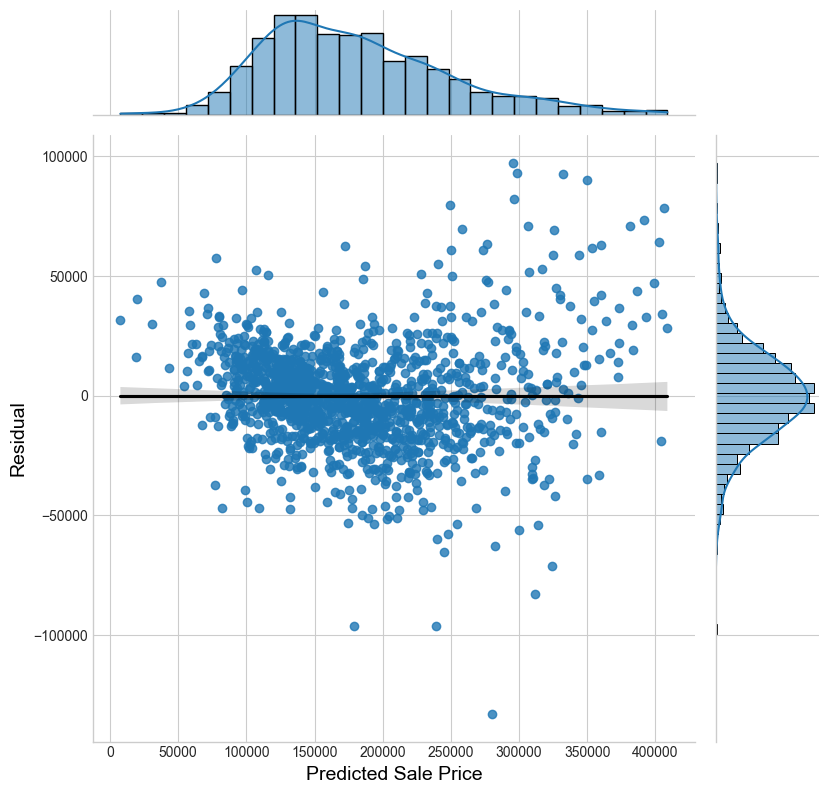

In [38]:
x=pred
y=resid
plt.figure(figsize=(20,8))
sns.jointplot(x=x, y=y, kind = "reg", data = df_realestate, ratio=5, height = 8,
              line_kws={'color': 'black'})
plt.xlabel('Predicted Sale Price', color = 'black', fontsize='14',loc='center')
plt.ylabel('Residual', color = 'black', fontsize='14',loc='center')

<h4 style="color:black;"> Create a Correlation Matrix</h4>

In [39]:
X=X.drop('const', axis=1)

In [40]:
corrMatrix=X.corr()
df_corrMatrix=pd.DataFrame(corrMatrix)
df_corrMatrix

,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Kitchen Qual,Total Rooms Above Grade,Fireplaces,Garage Cars,Porch Area,Extra Kitchens,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2-STORY PUD,lc_Hillside,nh_Briardale,nh_Brookside,nh_Crawford,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Somerset,nh_Stone Brook,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,sc_Abnormal Sale,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished
Lot Area,1.000000,0.065029,0.000716,-0.005572,0.051788,0.159935,-0.009324,0.251585,0.013684,0.105437,0.034720,0.148136,0.249338,0.127428,0.149893,-0.012915,-0.052736,-0.132769,-0.170927,0.079225,-0.094423,-0.057458,0.026362,-0.058702,0.049729,0.006651,0.032122,-0.068340,-0.029493,0.046152,-0.011412,-0.005847,0.047035,0.031052,-0.029849,0.000583,-0.010674,0.075894,0.017024,-0.059019
Overall Quality,0.065029,1.000000,-0.120603,0.594036,0.382993,0.189307,0.302580,0.439118,0.260637,0.066511,0.665918,0.389607,0.370073,0.606283,0.274596,-0.178664,-0.256611,0.181518,0.003897,0.104071,-0.034848,-0.142576,0.026175,-0.007188,0.206315,0.372243,0.036972,0.234174,0.187168,0.040664,-0.084328,-0.137440,0.028816,-0.004689,-0.103849,0.310989,-0.028844,0.381246,0.222348,-0.436926
Overall Cond,0.000716,-0.120603,1.000000,-0.399380,-0.128222,-0.040787,-0.155699,-0.150636,0.023249,0.014872,-0.050247,-0.056099,-0.032287,-0.209703,0.029986,-0.083059,0.065282,-0.127459,-0.072503,-0.004323,-0.014751,0.100214,0.181616,-0.002356,-0.057570,-0.126897,0.076675,-0.129271,-0.067860,0.055725,0.078455,0.040481,0.063217,-0.007087,-0.037052,-0.155944,-0.026143,-0.135373,-0.098077,0.208044
Year Built,-0.005572,0.594036,-0.399380,1.000000,0.299953,0.222474,0.166321,0.264589,0.002766,-0.086149,0.535777,0.074051,0.133197,0.553881,0.089000,-0.186228,-0.329984,0.234128,0.111339,0.045739,-0.002343,-0.259374,-0.196430,0.011846,0.131942,0.267166,0.028100,0.284335,0.108642,0.030893,-0.234249,-0.138385,-0.009492,0.032471,-0.119144,0.338220,-0.040583,0.378652,0.310741,-0.524964
Masonry/Veneer Area,0.051788,0.382993,-0.128222,0.299953,1.000000,0.202266,0.118931,0.284675,0.139341,0.086692,0.256232,0.234837,0.224350,0.350216,0.134433,-0.040830,-0.109876,0.015521,0.084525,0.012890,0.128038,-0.102432,-0.021131,-0.047332,0.274849,0.304117,0.102930,0.071957,0.025657,-0.035517,-0.059755,-0.020709,0.016350,-0.048886,-0.042255,0.135079,-0.009206,0.164190,0.122460,-0.210423
Basement Finished Area,0.159935,0.189307,-0.040787,0.222474,0.202266,1.000000,-0.539857,0.366030,-0.202450,-0.135946,0.187562,-0.036305,0.226387,0.209568,0.176497,-0.087712,-0.120497,0.100846,-0.088806,0.029970,-0.048627,-0.101802,0.015766,0.000513,0.128008,0.128647,0.038274,-0.069242,0.099220,0.079691,-0.072350,-0.000828,0.019551,-0.009439,-0.031438,-0.006474,0.001445,0.160070,0.072160,-0.160329
Basement Unfinished Area,-0.009324,0.302580,-0.155699,0.166321,0.118931,-0.539857,1.000000,0.337981,-0.014168,0.152541,0.210535,0.249812,0.037725,0.212547,0.034036,0.047964,0.003934,0.044242,-0.089934,0.028958,-0.057947,-0.004446,-0.023599,-0.024990,0.034605,0.173098,-0.002090,0.136775,0.014791,-0.059574,-0.020279,-0.064257,0.007925,-0.011231,-0.020528,0.252912,0.021154,0.060821,0.099476,-0.143227
1st Floor Area,0.251585,0.439118,-0.150636,0.264589,0.284675,0.366030,0.337981,1.000000,-0.290787,0.107516,0.356771,0.358719,0.377439,0.427188,0.264687,0.077447,-0.149861,0.112253,-0.270912,0.049666,-0.170649,-0.122166,0.059434,-0.053462,0.141049,0.255777,0.099661,-0.019495,0.114076,0.060968,-0.075375,-0.016812,0.113321,-0.008752,-0.036336,0.182977,0.024069,0.203147,0.138982,-0.252117
2nd Floor Area,0.013684,0.260637,0.023249,0.002766,0.139341,-0.202450,-0.014168,-0.290787,1.000000,0.489996,0.141170,0.604560,0.174954,0.156480,0.157288,0.066480,-0.175314,-0.209660,0.1564

<h4 style="color:black;"> Create the Variance Inflation Factor (VIF)</h4>

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#Creating the Variance Inflation Factor (VIF) for the new model
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,Features
3,120.2,Year Built
11,90.2,Total Rooms Above Grade
1,74.8,Overall Quality
7,53.9,1st Floor Area
9,35.1,Bedrooms Above Grade
10,34.6,Kitchen Qual
2,33.1,Overall Cond
13,20.3,Garage Cars
39,15.8,gf_Unfinished
38,13.6,gf_Rough Finished


<h4 style="color:black;"> Explanation of the results</h4>

There is no dramatic changes in this Model2. R-squared value of this is found to be 0.911 whereas previous model has R-squared value 0.913. This is expected because we removed the features from this model2 which were not contributing to the previous model1. We observe these features were helping the model to improve the R-squared value 0.002. So, it is reasonable to remove those features from the model.   

Also there are 14 features whose VIF factor is greater than 5. These may introduce collinearity in the new model2

<h4 style="color:black;"> 7c: Proceed to eliminate ONE feature at a time to create a final model</h4>

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot Area                   1387 non-null   int64  
 1   Overall Quality            1387 non-null   int64  
 2   Overall Cond               1387 non-null   int64  
 3   Year Built                 1387 non-null   int64  
 4   Masonry/Veneer Area        1387 non-null   float64
 5   Basement Finished Area     1387 non-null   int64  
 6   Basement Unfinished Area   1387 non-null   int64  
 7   1st Floor Area             1387 non-null   int64  
 8   2nd Floor Area             1387 non-null   int64  
 9   Bedrooms Above Grade       1387 non-null   int64  
 10  Kitchen Qual               1387 non-null   int64  
 11  Total Rooms Above Grade    1387 non-null   int64  
 12  Fireplaces                 1387 non-null   int64  
 13  Garage Cars                1387 non-null   int64

In [44]:
X=X.drop('dt_1-STORY 1945 & OLDER', axis=1)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot Area                   1387 non-null   int64  
 1   Overall Quality            1387 non-null   int64  
 2   Overall Cond               1387 non-null   int64  
 3   Year Built                 1387 non-null   int64  
 4   Masonry/Veneer Area        1387 non-null   float64
 5   Basement Finished Area     1387 non-null   int64  
 6   Basement Unfinished Area   1387 non-null   int64  
 7   1st Floor Area             1387 non-null   int64  
 8   2nd Floor Area             1387 non-null   int64  
 9   Bedrooms Above Grade       1387 non-null   int64  
 10  Kitchen Qual               1387 non-null   int64  
 11  Total Rooms Above Grade    1387 non-null   int64  
 12  Fireplaces                 1387 non-null   int64  
 13  Garage Cars                1387 non-null   int64

In [46]:
y=df_reg['Sale Price']

In [47]:
X = sm.add_constant(X) # adding a constant

Model3 = sm.OLS(y, X).fit()

pred3 = Model3.predict(X)
resid3 = Model3.resid
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     354.5
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:29   Log-Likelihood:                -15785.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1347   BIC:                         3.186e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.164e+05   6.99e+04    -11.682      0.000   -9.54e+05   -6.79e+05
Lot Area                      0.5241      0.064      8.238      0.000       0.399       0.649
Overall Quality            1.042e+04    815.721     12.778      0.000    8823.216     1.2e+04
Overall Cond               4995.4228    629.571      7.935      0.000    3760.376    6230.469
Year Built                  390.0280     35.674     10.933      0.000     320.044     460.012
Masonry/Veneer Area          13.5701      4.031      3.367      0.001       5.663      21.477
Basement Finished Area       27.8410      2.482     11.215      0.000      22.971      32.711
Basement Unfinished Area      6.9670      2.371      2.938      0.003       2.315      11.619
1st Floor Area               62.9928      3.495     18.026      0.000      56.137      69.848
2nd Floor Area               51.3580      2.897     17.726      0.000      45.674      57.042
Bedrooms Above Grade      -5612.4548   1130.883     -4.963      0.000   -7830.938   -3393.972
Kitchen Qual               8425.2205   1328.902      6.340      0.000    5818.279     1.1e+04
Total Rooms Above Grade    1158.7298    819.946      1.413      0.158    -449.780    2767.239
Fireplaces                 1966.3036   1129.814      1.740      0.082    -250.082    4182.689
Garage Cars                8611.5560   1392.536      6.184      0.000    5879.781    1.13e+04
Porch Area                   25.3373      4.186      6.053      0.000      17.126      33.549
Extra Kitchens            -2.242e+04   3183.181     -7.045      0.000   -2.87e+04   -1.62e+04
dt_1-STORY PUD            -2.173e+04   2875.007     -7.560      0.000   -2.74e+04   -1.61e+04
dt_2-STORY PUD            -3.105e+04   3794.820     -8.184      0.000   -3.85e+04   -2.36e+04
lc_Hillside                1.203e+04   3363.557      3.576      0.000    5430.449    1.86e+04
nh_Briardale               1.082e+04   6620.842      1.634      0.102   -2169.233    2.38e+04
nh_Brookside               1.151e+04   3355.496      3.429      0.001    4923.096    1.81e+04
nh_Crawford                2.277e+04   3483.079      6.536      0.000    1.59e+04    2.96e+04
nh_Northpark Villa         1.697e+04   7658.280      2.216      0.027    1949.833     3.2e+04
nh_Northridge              2.656e+04   4031.425      6.589      0.000    1.87e+04    3.45e+04
nh_Northridge Heights      3.826e+04   3212.167     11.912      0.000     3.2e+04    4.46e+04
nh_Northwest Ames         -8230.2434   2788.356     -2.952      0.003   -1.37e+04   -2760.250
nh_Somerset                1.689e+04   2911.881      5.802      0.000    1.12e+04    2.26e+04
nh_Stone Brook             3.789e+04   5034.959      7.526      0.000     2.8e+04    4.78e+04
nh_Veenker                 2.765e+04   6693.687      4.131      0.000    1.

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      1387 non-null   float64
 1   Lot Area                   1387 non-null   int64  
 2   Overall Quality            1387 non-null   int64  
 3   Overall Cond               1387 non-null   int64  
 4   Year Built                 1387 non-null   int64  
 5   Masonry/Veneer Area        1387 non-null   float64
 6   Basement Finished Area     1387 non-null   int64  
 7   Basement Unfinished Area   1387 non-null   int64  
 8   1st Floor Area             1387 non-null   int64  
 9   2nd Floor Area             1387 non-null   int64  
 10  Bedrooms Above Grade       1387 non-null   int64  
 11  Kitchen Qual               1387 non-null   int64  
 12  Total Rooms Above Grade    1387 non-null   int64  
 13  Fireplaces                 1387 non-null   int64

In [49]:
X=X.drop('const', axis=1)

In [50]:
X=X.drop('locc_Adjacent Pos Feature', axis=1)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lot Area                   1387 non-null   int64  
 1   Overall Quality            1387 non-null   int64  
 2   Overall Cond               1387 non-null   int64  
 3   Year Built                 1387 non-null   int64  
 4   Masonry/Veneer Area        1387 non-null   float64
 5   Basement Finished Area     1387 non-null   int64  
 6   Basement Unfinished Area   1387 non-null   int64  
 7   1st Floor Area             1387 non-null   int64  
 8   2nd Floor Area             1387 non-null   int64  
 9   Bedrooms Above Grade       1387 non-null   int64  
 10  Kitchen Qual               1387 non-null   int64  
 11  Total Rooms Above Grade    1387 non-null   int64  
 12  Fireplaces                 1387 non-null   int64  
 13  Garage Cars                1387 non-null   int64

In [52]:
y=df_reg['Sale Price']

In [53]:
X = sm.add_constant(X) # adding a constant

Model4 = sm.OLS(y, X).fit()

pred4 = Model4.predict(X)
resid4 = Model4.resid
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     363.8
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:35   Log-Likelihood:                -15785.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1348   BIC:                         3.185e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.169e+05   6.99e+04    -11.688      0.000   -9.54e+05    -6.8e+05
Lot Area                      0.5236      0.064      8.229      0.000       0.399       0.648
Overall Quality            1.045e+04    815.556     12.807      0.000    8845.198     1.2e+04
Overall Cond               4962.3073    628.915      7.890      0.000    3728.549    6196.065
Year Built                  390.4254     35.676     10.944      0.000     320.440     460.411
Masonry/Veneer Area          13.6236      4.031      3.380      0.001       5.716      21.531
Basement Finished Area       27.9782      2.480     11.284      0.000      23.114      32.842
Basement Unfinished Area      7.0869      2.369      2.991      0.003       2.439      11.734
1st Floor Area               62.5137      3.468     18.026      0.000      55.711      69.317
2nd Floor Area               51.1946      2.894     17.691      0.000      45.518      56.871
Bedrooms Above Grade      -5557.7413   1129.900     -4.919      0.000   -7774.295   -3341.187
Kitchen Qual               8404.2114   1328.879      6.324      0.000    5797.316     1.1e+04
Total Rooms Above Grade    1164.0867    820.001      1.420      0.156    -444.530    2772.703
Fireplaces                 1986.0150   1129.769      1.758      0.079    -230.282    4202.312
Garage Cars                8639.8508   1392.420      6.205      0.000    5908.306    1.14e+04
Porch Area                   25.4674      4.185      6.086      0.000      17.258      33.677
Extra Kitchens            -2.234e+04   3182.615     -7.020      0.000   -2.86e+04   -1.61e+04
dt_1-STORY PUD            -2.169e+04   2874.924     -7.543      0.000   -2.73e+04    -1.6e+04
dt_2-STORY PUD            -3.112e+04   3794.666     -8.201      0.000   -3.86e+04   -2.37e+04
lc_Hillside                1.187e+04   3360.877      3.533      0.000    5279.240    1.85e+04
nh_Briardale               1.074e+04   6621.001      1.622      0.105   -2250.392    2.37e+04
nh_Brookside               1.151e+04   3355.780      3.429      0.001    4923.336    1.81e+04
nh_Crawford                2.276e+04   3483.362      6.533      0.000    1.59e+04    2.96e+04
nh_Northpark Villa         1.693e+04   7658.847      2.211      0.027    1909.725     3.2e+04
nh_Northridge              2.667e+04   4030.517      6.618      0.000    1.88e+04    3.46e+04
nh_Northridge Heights      3.833e+04   3211.884     11.933      0.000     3.2e+04    4.46e+04
nh_Northwest Ames         -8638.1428   2764.192     -3.125      0.002   -1.41e+04   -3215.557
nh_Somerset                1.689e+04   2912.128      5.801      0.000    1.12e+04    2.26e+04
nh_Stone Brook             3.802e+04   5034.092      7.553      0.000    2.81e+04    4.79e+04
nh_Veenker                 2.779e+04   6693.164      4.152      0.000    1.

In [54]:
X=X.drop('const', axis=1)

In [55]:
X=X.drop('Total Rooms Above Grade', axis=1)

In [56]:
y=df_reg['Sale Price']

In [57]:
X = sm.add_constant(X) # adding a constant

Model5 = sm.OLS(y, X).fit()

pred5 = Model5.predict(X)
resid5 = Model5.resid
Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     373.3
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:38   Log-Likelihood:                -15786.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1349   BIC:                         3.185e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.074e+05   6.96e+04    -11.601      0.000   -9.44e+05   -6.71e+05
Lot Area                      0.5198      0.064      8.174      0.000       0.395       0.645
Overall Quality             1.05e+04    814.981     12.882      0.000    8900.159    1.21e+04
Overall Cond               4954.4897    629.127      7.875      0.000    3720.316    6188.664
Year Built                  386.4954     35.582     10.862      0.000     316.694     456.297
Masonry/Veneer Area          13.5173      4.032      3.353      0.001       5.608      21.426
Basement Finished Area       27.7584      2.476     11.213      0.000      22.902      32.615
Basement Unfinished Area      7.0527      2.370      2.976      0.003       2.404      11.702
1st Floor Area               64.7799      3.080     21.033      0.000      58.738      70.822
2nd Floor Area               53.5919      2.351     22.797      0.000      48.980      58.204
Bedrooms Above Grade      -4877.0010   1023.484     -4.765      0.000   -6884.794   -2869.208
Kitchen Qual               8492.3565   1327.927      6.395      0.000    5887.330    1.11e+04
Fireplaces                 1992.0112   1130.186      1.763      0.078    -225.103    4209.125
Garage Cars                8735.7734   1391.302      6.279      0.000    6006.422    1.15e+04
Porch Area                   25.2282      4.183      6.031      0.000      17.023      33.434
Extra Kitchens            -2.133e+04   3101.982     -6.875      0.000   -2.74e+04   -1.52e+04
dt_1-STORY PUD            -2.202e+04   2866.458     -7.681      0.000   -2.76e+04   -1.64e+04
dt_2-STORY PUD            -3.196e+04   3750.305     -8.521      0.000   -3.93e+04   -2.46e+04
lc_Hillside                1.186e+04   3362.122      3.526      0.000    5260.444    1.85e+04
nh_Briardale               1.181e+04   6580.129      1.795      0.073   -1096.426    2.47e+04
nh_Brookside               1.121e+04   3350.706      3.347      0.001    4640.741    1.78e+04
nh_Crawford                2.268e+04   3484.260      6.510      0.000    1.58e+04    2.95e+04
nh_Northpark Villa         1.753e+04   7650.217      2.291      0.022    2522.461    3.25e+04
nh_Northridge              2.613e+04   4013.727      6.510      0.000    1.83e+04     3.4e+04
nh_Northridge Heights      3.873e+04   3200.662     12.100      0.000    3.25e+04     4.5e+04
nh_Northwest Ames         -8587.0540   2764.998     -3.106      0.002    -1.4e+04   -3162.892
nh_Somerset                 1.68e+04   2912.416      5.767      0.000    1.11e+04    2.25e+04
nh_Stone Brook             3.789e+04   5035.157      7.525      0.000     2.8e+04    4.78e+04
nh_Veenker                 2.774e+04   6695.610      4.144      0.000    1.46e+04    4.09e+04
locc_Adjacent Arterial St -8845.2682   3511.858     -2.519      0.012   -1.

In [58]:
X=X.drop('const', axis=1)

In [59]:
X=X.drop('Fireplaces', axis=1)

In [60]:
y=df_reg['Sale Price']

In [61]:
X = sm.add_constant(X) # adding a constant

Model6 = sm.OLS(y, X).fit()

pred6 = Model6.predict(X)
resid6 = Model6.resid
Model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     382.9
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:42   Log-Likelihood:                -15788.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1350   BIC:                         3.184e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.035e+05   6.96e+04    -11.542      0.000    -9.4e+05   -6.67e+05
Lot Area                      0.5354      0.063      8.497      0.000       0.412       0.659
Overall Quality            1.064e+04    811.426     13.118      0.000    9052.555    1.22e+04
Overall Cond               4889.3431    628.530      7.779      0.000    3656.341    6122.345
Year Built                  384.0524     35.582     10.793      0.000     314.250     453.855
Masonry/Veneer Area          13.9319      4.028      3.459      0.001       6.030      21.834
Basement Finished Area       27.7881      2.478     11.216      0.000      22.928      32.648
Basement Unfinished Area      6.8123      2.368      2.877      0.004       2.167      11.457
1st Floor Area               66.0946      2.991     22.101      0.000      60.228      71.961
2nd Floor Area               54.4263      2.304     23.617      0.000      49.905      58.947
Bedrooms Above Grade      -5007.7266   1021.589     -4.902      0.000   -7011.801   -3003.652
Kitchen Qual               8414.3732   1328.225      6.335      0.000    5808.765     1.1e+04
Garage Cars                8651.0245   1391.556      6.217      0.000    5921.178    1.14e+04
Porch Area                   25.7097      4.177      6.155      0.000      17.515      33.904
Extra Kitchens            -2.202e+04   3079.509     -7.149      0.000   -2.81e+04    -1.6e+04
dt_1-STORY PUD            -2.187e+04   2867.466     -7.627      0.000   -2.75e+04   -1.62e+04
dt_2-STORY PUD            -3.199e+04   3753.187     -8.523      0.000   -3.93e+04   -2.46e+04
lc_Hillside                1.187e+04   3364.729      3.529      0.000    5273.092    1.85e+04
nh_Briardale               1.142e+04   6581.481      1.735      0.083   -1491.944    2.43e+04
nh_Brookside               1.142e+04   3351.318      3.407      0.001    4843.564     1.8e+04
nh_Crawford                2.364e+04   3443.890      6.865      0.000    1.69e+04    3.04e+04
nh_Northpark Villa         1.831e+04   7643.415      2.395      0.017    3314.229    3.33e+04
nh_Northridge               2.58e+04   4012.532      6.430      0.000    1.79e+04    3.37e+04
nh_Northridge Heights      3.867e+04   3202.977     12.073      0.000    3.24e+04     4.5e+04
nh_Northwest Ames         -8192.0544   2758.050     -2.970      0.003   -1.36e+04   -2781.525
nh_Somerset                1.642e+04   2906.813      5.648      0.000    1.07e+04    2.21e+04
nh_Stone Brook             3.749e+04   5033.816      7.447      0.000    2.76e+04    4.74e+04
nh_Veenker                 2.832e+04   6692.896      4.231      0.000    1.52e+04    4.14e+04
locc_Adjacent Arterial St -8511.0378   3509.470     -2.425      0.015   -1.54e+04   -1626.431
locc_Adjacent Feeder St   -7580.1075   2698.211     -2.809      0.005   -1.

In [62]:
X=X.drop('const', axis=1)

In [63]:
X=X.drop('nh_Briardale', axis=1)

In [64]:
y=df_reg['Sale Price']

In [65]:
X = sm.add_constant(X) # adding a constant

Model7 = sm.OLS(y, X).fit()

pred7 = Model7.predict(X)
resid7 = Model7.resid
Model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     393.2
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:45   Log-Likelihood:                -15789.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1351   BIC:                         3.184e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.021e+05   6.97e+04    -11.515      0.000   -9.39e+05   -6.65e+05
Lot Area                      0.5355      0.063      8.491      0.000       0.412       0.659
Overall Quality            1.075e+04    809.596     13.282      0.000    9165.071    1.23e+04
Overall Cond               4888.4166    628.998      7.772      0.000    3654.498    6122.335
Year Built                  383.3447     35.606     10.766      0.000     313.495     453.194
Masonry/Veneer Area          14.9814      3.985      3.759      0.000       7.164      22.799
Basement Finished Area       27.8696      2.479     11.243      0.000      23.007      32.732
Basement Unfinished Area      6.9270      2.369      2.925      0.004       2.280      11.573
1st Floor Area               65.8458      2.989     22.027      0.000      59.982      71.710
2nd Floor Area               54.3289      2.306     23.565      0.000      49.806      58.852
Bedrooms Above Grade      -5034.1760   1022.235     -4.925      0.000   -7039.516   -3028.836
Kitchen Qual               8333.1814   1328.387      6.273      0.000    5727.255    1.09e+04
Garage Cars                8532.5712   1390.914      6.135      0.000    5803.986    1.13e+04
Porch Area                   25.6944      4.180      6.147      0.000      17.494      33.895
Extra Kitchens            -2.202e+04   3081.799     -7.145      0.000   -2.81e+04    -1.6e+04
dt_1-STORY PUD            -2.167e+04   2867.384     -7.559      0.000   -2.73e+04    -1.6e+04
dt_2-STORY PUD            -2.881e+04   3279.800     -8.785      0.000   -3.52e+04   -2.24e+04
lc_Hillside                1.179e+04   3366.882      3.502      0.000    5184.706    1.84e+04
nh_Brookside               1.128e+04   3352.891      3.365      0.001    4704.343    1.79e+04
nh_Crawford                 2.35e+04   3445.522      6.822      0.000    1.67e+04    3.03e+04
nh_Northpark Villa         1.639e+04   7569.024      2.166      0.030    1546.286    3.12e+04
nh_Northridge              2.556e+04   4013.110      6.369      0.000    1.77e+04    3.34e+04
nh_Northridge Heights      3.815e+04   3191.337     11.954      0.000    3.19e+04    4.44e+04
nh_Northwest Ames         -8322.6588   2759.073     -3.016      0.003   -1.37e+04   -2910.126
nh_Somerset                1.536e+04   2843.933      5.400      0.000    9779.071    2.09e+04
nh_Stone Brook             3.694e+04   5027.872      7.348      0.000    2.71e+04    4.68e+04
nh_Veenker                 2.834e+04   6697.867      4.231      0.000    1.52e+04    4.15e+04
locc_Adjacent Arterial St -8675.5554   3510.798     -2.471      0.014   -1.56e+04   -1788.348
locc_Adjacent Feeder St   -7598.6883   2700.196     -2.814      0.005   -1.29e+04   -2301.655
locc_Adjacent Railroad    -7571.0735   3709.020     -2.041      0.041   -1.

<h4 style="color:black;"> 7d: Review Final Model for Multi-collinearity</h4>

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
#Creating the Variance Inflation Factor (VIF) for the new model
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,Features
0,14493.3,const
34,9.3,gf_Rough Finished
35,9.2,gf_Unfinished
33,8.9,gf_Finished
8,3.6,1st Floor Area
2,3.5,Overall Quality
4,3.4,Year Built
7,3.3,Basement Unfinished Area
6,3.3,Basement Finished Area
9,2.9,2nd Floor Area


VIF factor should be equal or less that 5. However, there are feature whose VIF us greater than 5. Based on that, The decision to eliminate gf_Finished was because it had high multi-collinearity with the other two features.

In [68]:
df_reg8=X.copy()

In [69]:
X=X.drop('const', axis=1)

In [70]:
X=X.drop('gf_Finished', axis=1)

In [71]:
y=df_reg['Sale Price']

In [72]:
X = sm.add_constant(X) # adding a constant

Model8 = sm.OLS(y, X).fit()

pred8 = Model8.predict(X)
resid8 = Model8.resid
Model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     403.0
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:42:54   Log-Likelihood:                -15793.
No. Observations:                1387   AIC:                         3.166e+04
Df Residuals:                    1352   BIC:                         3.184e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.922e+05   6.97e+04    -11.367      0.000   -9.29e+05   -6.55e+05
Lot Area                      0.5335      0.063      8.444      0.000       0.410       0.657
Overall Quality            1.069e+04    810.886     13.187      0.000    9102.665    1.23e+04
Overall Cond               4805.1391    629.412      7.634      0.000    3570.409    6039.869
Year Built                  375.7195     35.551     10.568      0.000     305.978     445.461
Masonry/Veneer Area          15.0970      3.993      3.781      0.000       7.264      22.930
Basement Finished Area       27.9850      2.483     11.268      0.000      23.113      32.857
Basement Unfinished Area      7.2601      2.370      3.064      0.002       2.611      11.909
1st Floor Area               65.7487      2.995     21.952      0.000      59.873      71.624
2nd Floor Area               54.1202      2.309     23.442      0.000      49.591      58.649
Bedrooms Above Grade      -4913.7273   1023.197     -4.802      0.000   -6920.954   -2906.501
Kitchen Qual               8359.7526   1331.027      6.281      0.000    5748.650     1.1e+04
Garage Cars                6740.6663   1201.502      5.610      0.000    4383.656    9097.677
Porch Area                   25.6735      4.189      6.129      0.000      17.457      33.890
Extra Kitchens            -2.056e+04   3033.777     -6.776      0.000   -2.65e+04   -1.46e+04
dt_1-STORY PUD            -2.223e+04   2864.961     -7.758      0.000   -2.78e+04   -1.66e+04
dt_2-STORY PUD            -2.874e+04   3286.304     -8.747      0.000   -3.52e+04   -2.23e+04
lc_Hillside                 1.23e+04   3367.648      3.653      0.000    5694.655    1.89e+04
nh_Brookside                1.17e+04   3355.675      3.486      0.001    5113.804    1.83e+04
nh_Crawford                2.311e+04   3448.917      6.700      0.000    1.63e+04    2.99e+04
nh_Northpark Villa         1.732e+04   7575.574      2.286      0.022    2456.203    3.22e+04
nh_Northridge              2.642e+04   4006.962      6.593      0.000    1.86e+04    3.43e+04
nh_Northridge Heights      3.907e+04   3177.296     12.296      0.000    3.28e+04    4.53e+04
nh_Northwest Ames         -8177.3813   2764.048     -2.958      0.003   -1.36e+04   -2755.092
nh_Somerset                1.586e+04   2842.700      5.580      0.000    1.03e+04    2.14e+04
nh_Stone Brook             3.721e+04   5036.949      7.387      0.000    2.73e+04    4.71e+04
nh_Veenker                 2.868e+04   6710.046      4.274      0.000    1.55e+04    4.18e+04
locc_Adjacent Arterial St -8711.5657   3517.854     -2.476      0.013   -1.56e+04   -1810.520
locc_Adjacent Feeder St   -7283.8731   2702.799     -2.695      0.007   -1.26e+04   -1981.738
locc_Adjacent Railroad    -7946.5315   3713.558     -2.140      0.033   -1.

<h4 style="color:black;"> 7e: Review Final Model for Multi-collinearity</h4>

In [73]:
#Creating the Variance Inflation Factor (VIF) for the new model
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,Features
0,14447.5,const
8,3.6,1st Floor Area
2,3.5,Overall Quality
7,3.3,Basement Unfinished Area
4,3.3,Year Built
6,3.3,Basement Finished Area
9,2.9,2nd Floor Area
12,2.2,Garage Cars
11,2.2,Kitchen Qual
34,2.1,gf_Unfinished


As we can see from above, in the Final model, p value of all the features are less than 0.05. Hence, all the features in this model are contributing to the model. In addition, from VIF factor analysis, we can observe all the features having VIF factor less than 5. Hence, there is no multicolinnearity. After reoving previous features based on this two reasons, we did not lose over R-squared value of the model. Our current model R-squared value is 0.910 whereas initial model's R-squared value was 0.913. Moreover, F-statistics value of the current model increased to 403 whereas initial model was 188 which suggests latest model or oir final model has more strong relationship between dependent and independent variable.

In [74]:
X=X.drop('const', axis=1)

Text(70.20833333333333, 0.5, 'Residual')

<Figure size 2000x800 with 0 Axes>

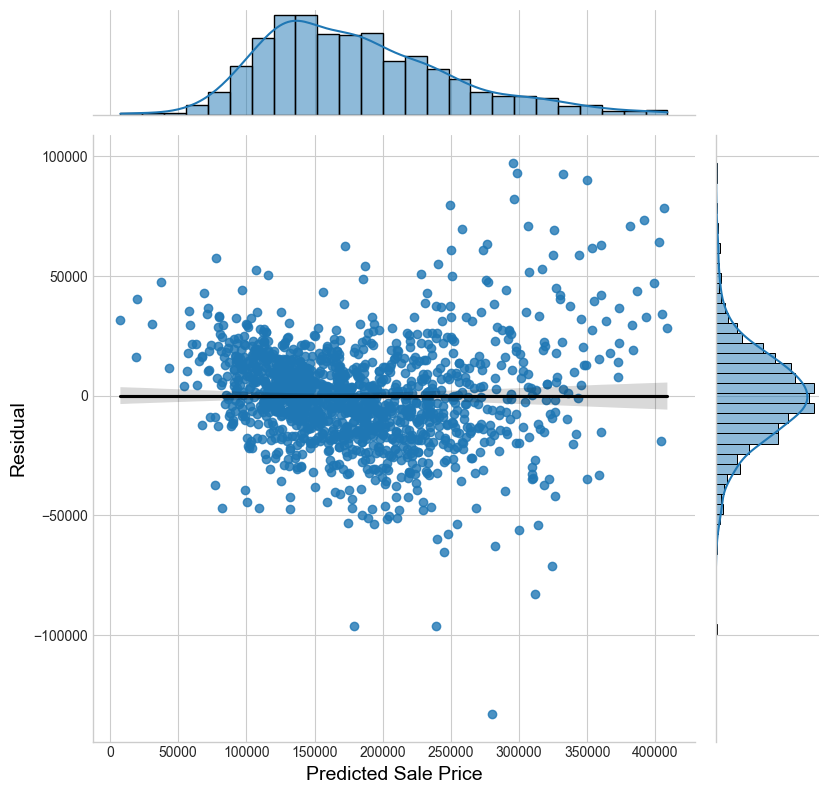

In [75]:
x=pred
y=resid
plt.figure(figsize=(20,8))
sns.jointplot(x=x, y=y, kind = "reg", data = df_realestate, ratio=5, height = 8,
              line_kws={'color': 'black'})
plt.xlabel('Predicted Sale Price', color = 'black', fontsize='14',loc='center')
plt.ylabel('Residual', color = 'black', fontsize='14',loc='center')

In [76]:
corrMatrix=X.corr()
df_corrMatrix=pd.DataFrame(corrMatrix)
df_corrMatrix

,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Kitchen Qual,Garage Cars,Porch Area,Extra Kitchens,dt_1-STORY PUD,dt_2-STORY PUD,lc_Hillside,nh_Brookside,nh_Crawford,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Somerset,nh_Stone Brook,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Railroad,sc_Abnormal Sale,sc_Home not complete,sc_Sale within Family,gf_Rough Finished,gf_Unfinished
Lot Area,1.000000,0.065029,0.000716,-0.005572,0.051788,0.159935,-0.009324,0.251585,0.013684,0.105437,0.034720,0.127428,0.149893,-0.012915,-0.132769,-0.170927,0.079225,-0.057458,0.026362,-0.058702,0.049729,0.006651,0.032122,-0.068340,-0.029493,0.046152,-0.011412,-0.005847,0.031052,-0.029849,0.000583,-0.010674,0.017024,-0.059019
Overall Quality,0.065029,1.000000,-0.120603,0.594036,0.382993,0.189307,0.302580,0.439118,0.260637,0.066511,0.665918,0.606283,0.274596,-0.178664,0.181518,0.003897,0.104071,-0.142576,0.026175,-0.007188,0.206315,0.372243,0.036972,0.234174,0.187168,0.040664,-0.084328,-0.137440,-0.004689,-0.103849,0.310989,-0.028844,0.222348,-0.436926
Overall Cond,0.000716,-0.120603,1.000000,-0.399380,-0.128222,-0.040787,-0.155699,-0.150636,0.023249,0.014872,-0.050247,-0.209703,0.029986,-0.083059,-0.127459,-0.072503,-0.004323,0.100214,0.181616,-0.002356,-0.057570,-0.126897,0.076675,-0.129271,-0.067860,0.055725,0.078455,0.040481,-0.007087,-0.037052,-0.155944,-0.026143,-0.098077,0.208044
Year Built,-0.005572,0.594036,-0.399380,1.000000,0.299953,0.222474,0.166321,0.264589,0.002766,-0.086149,0.535777,0.553881,0.089000,-0.186228,0.234128,0.111339,0.045739,-0.259374,-0.196430,0.011846,0.131942,0.267166,0.028100,0.284335,0.108642,0.030893,-0.234249,-0.138385,0.032471,-0.119144,0.338220,-0.040583,0.310741,-0.524964
Masonry/Veneer Area,0.051788,0.382993,-0.128222,0.299953,1.000000,0.202266,0.118931,0.284675,0.139341,0.086692,0.256232,0.350216,0.134433,-0.040830,0.015521,0.084525,0.012890,-0.102432,-0.021131,-0.047332,0.274849,0.304117,0.102930,0.071957,0.025657,-0.035517,-0.059755,-0.020709,-0.048886,-0.042255,0.135079,-0.009206,0.122460,-0.210423
Basement Finished Area,0.159935,0.189307,-0.040787,0.222474,0.202266,1.000000,-0.539857,0.366030,-0.202450,-0.135946,0.187562,0.209568,0.176497,-0.087712,0.100846,-0.088806,0.029970,-0.101802,0.015766,0.000513,0.128008,0.128647,0.038274,-0.069242,0.099220,0.079691,-0.072350,-0.000828,-0.009439,-0.031438,-0.006474,0.001445,0.072160,-0.160329
Basement Unfinished Area,-0.009324,0.302580,-0.155699,0.166321,0.118931,-0.539857,1.000000,0.337981,-0.014168,0.152541,0.210535,0.212547,0.034036,0.047964,0.044242,-0.089934,0.028958,-0.004446,-0.023599,-0.024990,0.034605,0.173098,-0.002090,0.136775,0.014791,-0.059574,-0.020279,-0.064257,-0.011231,-0.020528,0.252912,0.021154,0.099476,-0.143227
1st Floor Area,0.251585,0.439118,-0.150636,0.264589,0.284675,0.366030,0.337981,1.000000,-0.290787,0.107516,0.356771,0.427188,0.264687,0.077447,0.112253,-0.270912,0.049666,-0.122166,0.059434,-0.053462,0.141049,0.255777,0.099661,-0.019495,0.114076,0.060968,-0.075375,-0.016812,-0.008752,-0.036336,0.182977,0.024069,0.138982,-0.252117
2nd Floor Area,0.013684,0.260637,0.023249,0.002766,0.139341,-0.202450,-0.014168,-0.290787,1.000000,0.489996,0.141170,0.156480,0.157288,0.066480,-0.209660,0.156425,0.007476,-0.007585,0.081998,-0.002742,0.220220,-0.007013,0.034880,0.067114,-0.024841,-0.045718,0.052038,-0.008213,0.034377,-0.035567,-0.007537,-0.028591,-0.009241,-0.078562
Bedrooms Above Grade,0.105437,0.066511,0.014872,-0.086149,0.086692,-0.135946,0.152541,0.107516,0.489996,1.000000,-0.042042,0.050717,0.071203,0.218494,-0.374121,-0.072920,-0.012227,-0.036117,0.028078,-0.033474,0.124432,-0.054364,0.119563,-0.068029,-0.105040,-0.079092,0.041677,0.058517,0.069090,-0.019644,-0.066313,0.063234,-0.023298,0.012456


<Axes: >

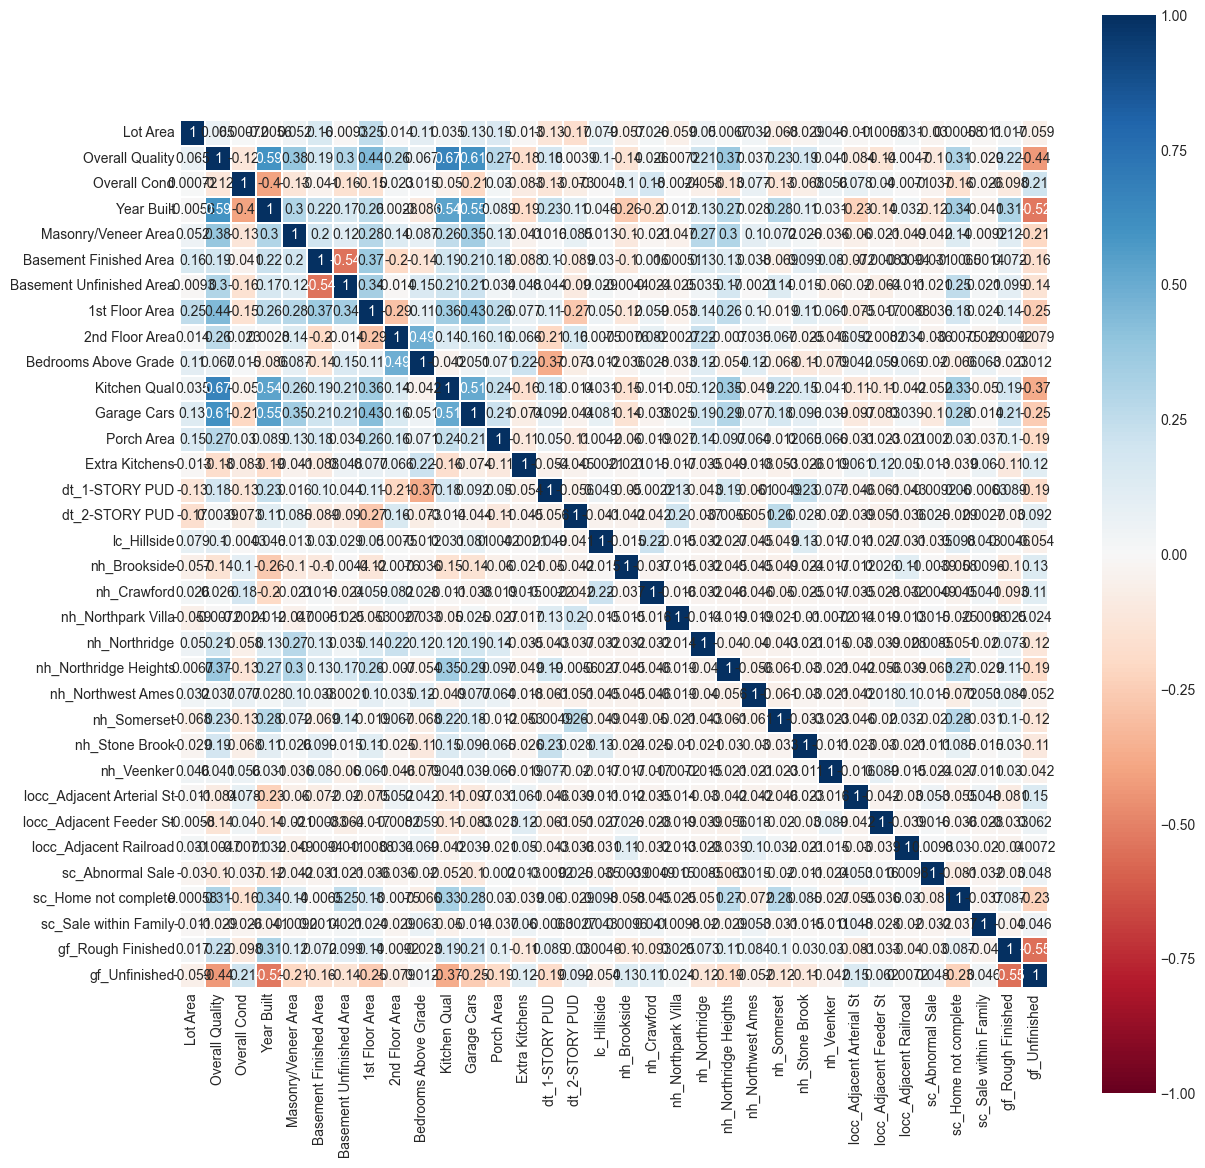

In [77]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, vmin= -1.0, square=True, cmap=colormap, annot=True)

From the visual correlation map, it is very clear correlation value between any two features mostly very low. So, the model does not have strong collinearity. 

nh_Northridge is the Neighborhood dummy variable. So, nh_Northridge=0 means corresponding home Neighborhood is not in Northridge, whereas nh_Northridge=1 means home Neighborhood is in Northridge. We can see from above nh_Northridge is in positive realtionship with Sale Price. That means, if home Neighborhood is in Northridge, Sale Price of the home will increase by 26420. On ther hand, if the home Neighborhood is not in Northridge, Sale Price of the home will decrease by 26420.   

In [78]:
round(2.642e+04)

26420

nh_Northwest Ames is the Neighborhood dummy variable. So, nh_Northwest Ames=0 means corresponding home Neighborhood is not in Northwest Ames, whereas nh_Northwest Ames=1 means home Neighborhood is in Northwest Ames. We can see from above nh_Northwest Ames is in negative relationship with the home's Sale Price. That means, when the home is in Northwest Ames, Sale price of the home will decrease by 8177.3813. On the ther hand, when the home is not in Northwest Ames, Sale Price will increase by 8177.3813.

nh_Stone Brook: nh_Stone Brook is the Neighborhood dummy variable. So, nh_Stone Brook=0 means corresponding home Neighborhood is not in Stone Brook, where as nh_Stone Brook=1 means home Neighborhood is in Stone Brook. From the relationship, we can say that if the home is in  Stone Brook, Sale Price will increase by 37210

In [79]:
round(3.721e+04)

37210

locc_Adjacent Railroad is the dummy variable for location condition in Adjacent Railroad. It is in negative relationship with Sale Price target variable. That means, if the home's location condition is in Adjacent Railroad, Sale Price will decrease by 7946.5315. 

<h3 style="color:black;"> 8. Create the Final Dataset</h3>

In [80]:
df_realestate_model = pd.concat([X, y, pd.DataFrame(pred8)], axis=1, ignore_index=False)
df_realestate_model=df_realestate_model.rename(columns = {'Sale Price':'Actual Sale Price'})
df_realestate_model=df_realestate_model.rename(columns = {0:'Sale Price Predicted'})
df_realestate_model = pd.concat([df_realestate_model, pd.DataFrame(resid8)], axis=1, ignore_index=False)
df_realestate_model=df_realestate_model.rename(columns = {0:'residual'})
df_realestate_model.head(5)

,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Kitchen Qual,Garage Cars,Porch Area,Extra Kitchens,dt_1-STORY PUD,dt_2-STORY PUD,lc_Hillside,nh_Brookside,nh_Crawford,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Somerset,nh_Stone Brook,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Railroad,sc_Abnormal Sale,sc_Home not complete,sc_Sale within Family,gf_Rough Finished,gf_Unfinished,Sale Price Predicted,Sale Price Predicted,residual
0,8450,7,5,2003,196.0,706,150,856,854,3,3,2,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,444.136252,207717.230552,782.769448
1,9600,6,8,1976,0.0,978,284,1262,0,3,2,2,298,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,-25761.103823,207126.370708,-25626.370708
2,11250,7,5,2001,162.0,486,434,920,866,3,3,2,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15541.818828,208221.150183,15278.849817
3,9550,7,5,1915,0.0,216,540,961,756,3,3,3,307,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,-53495.817316,191684.906294,-51684.906294
4,14260,8,5,2000,350.0,655,490,1145,1053,4,3,3,276,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-39894.819058,287286.459096,-37286.459096


In the above table, we are showing few values of our final dataset where based on the all features, how model predicted value differ from actual value. We are displaying this as residue as final column of the dataframe. For example, we can see from the first row, the homes actual Sale Price was 208500, whereas model predicted this Sale Price as 207717.230552. Thus model's prediction differ from actual prediction by 782.769448 which are showing as residue in the last column in the first row.

<h3 style="color:black;"> 9. Summary and Explanation of All Steps</h3>

In the multi-regression model, we can predict some feature based on multiple number of features. The feature which we are predicting is called target variable.   

When we predict some quantity using such multiregression model, we first have to validate the model. To validate the model, we compute various quantity for example R-squared, F-statistics, P-matrix, VIF factors and so on. Our first target is to get maximum R-squared value. In ideal case, R-squared value should be close to 1. So, more we are getting our R-squared value close to 1, more better the model is.  

Besides R-squared, we can investigate how strong relationship with the other features with the target variable. This can investigated through F-statistics. Large F-statistics value means more stronger relationship between dependent variables and target variables.   

When we are building such multiregression model, we also have to take care that all the f-featurs are contributing to the model or not. For that we can look into the p-matrix value. In deal case, pmatrix value corresponding to all the features should be close to zero. If it is not, we can drop that features and rerun the model to see how the model perform without that feature. Are we getting almost same R-squared value for the new model?

In addition, we should also investigate collinerity in the model. For that, we can compute correlation matrix, we can visulazie heatmap. We can do analysis of VIF factors for all the features. In ideal case, correlation matrix value should be small or VIF factor correposning to a feature should be less than 5. If that is not the case, we can drop that feature and rerun the model with updated features. 

There is no rule of thump or shortcut for building an ideal model. But, it is general recipe we can follow as described above.